# Imports

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

from src.sam_segmentation.yolo import load_yolov8_detector, yolov8_detect, draw_bounding_boxes
from src.sam_segmentation.sam import load_sam_predictor, sam_segmentation

# Utils functions


In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


# YOLOv8 trained on custom bubbles dataset

In [4]:
custom_yolo_checkpoint_path = r"C:\Internship\ITMO_ML\CTCI\checkpoints\yolov8\yolov8s_on_bubbles_24\run3\weights\best.pt"
detector = load_yolov8_detector(custom_yolo_checkpoint_path)

In [5]:
print(type(detector))

<class 'ultralytics.models.yolo.model.YOLO'>


In [6]:
image = cv2.imread(r'C:\Internship\ITMO_ML\CTCI\data\frame-0.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

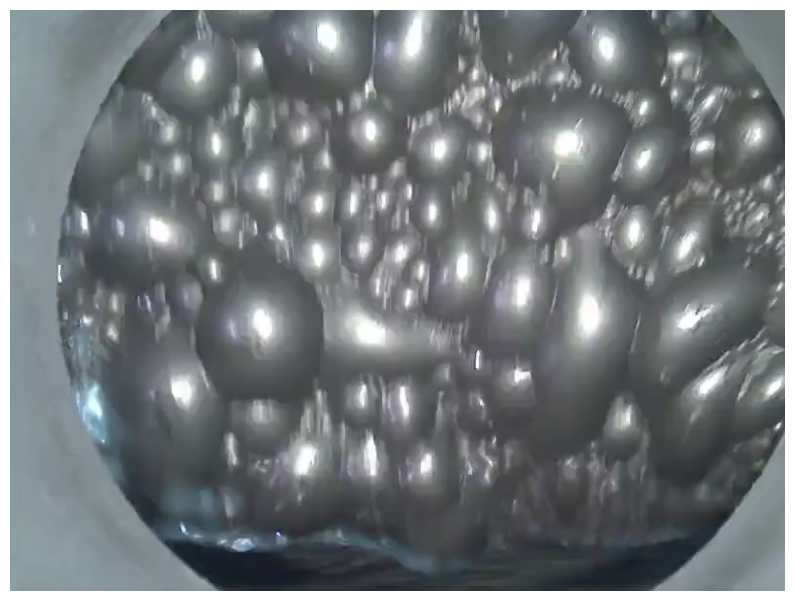

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
boxes = yolov8_detect(image=image, detector=detector, return_objects=False)

0: 608x800 262 Bubbless, 156.6ms
Speed: 3.0ms preprocess, 156.6ms inference, 60.8ms postprocess per image at shape (1, 3, 608, 800)


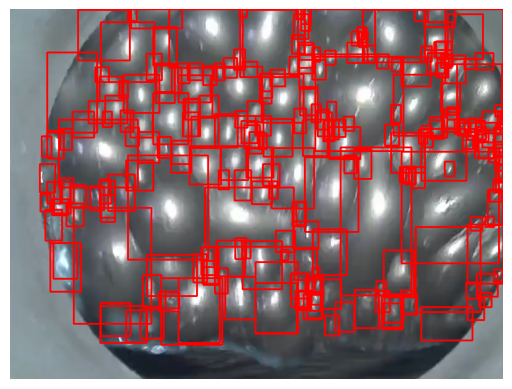

In [9]:
image_example = image.copy()

draw_bounding_boxes(image=image_example, boxes=boxes)

# SAM Checkpoint

In [10]:
sam_checkpoint = r"C:\Internship\ITMO_ML\CTCI\checkpoints\sam_checkpoints\sam_vit_h_4b8939.pth"
model_type = "vit_h"
device="cuda"

predictor = load_sam_predictor(checkpoint_path=sam_checkpoint, model_type=model_type, device=device)

# Segmentation by bounding box prompt

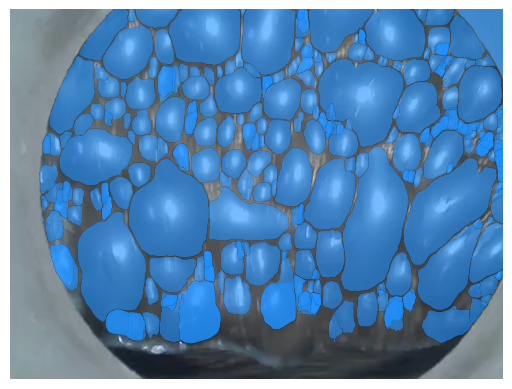

In [11]:
masks_list = sam_segmentation(image=image, predictor=predictor, boxes=boxes, prompt_point=False)
plt.figure()
plt.imshow(image)

for i in range(len(masks_list)):
    masks = masks_list[i]
    show_mask(masks[0], plt.gca())

plt.axis('off')
plt.show()

In [13]:
type(masks_list)

numpy.ndarray

# Segmentation by bounding box and point prompt


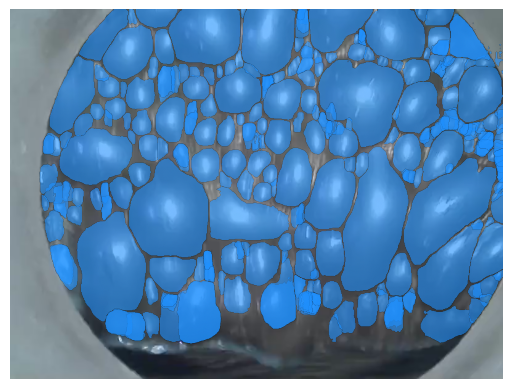

In [20]:
masks_list = sam_segmentation(image=image, predictor=predictor, boxes=boxes, prompt_point=True)

plt.figure()
plt.imshow(image)

for i in range(len(masks_list)):
    masks = masks_list[i]
    show_mask(masks[0], plt.gca())

plt.axis('off')
plt.show()